# Arrows And Barbs Maps Creations From Winds data (u, v, extract from NetCDF file of Era5)



## Prerequisites:

Python (This script was tested using Python 3.11.1) </br>
Free packages: </br>
Folium version ...</br>
Pandas version ...</br>
(Complete at the end)

In [17]:
import sys

restart = False


try:
    # xarray is used to read NetCDF file
    import xarray as xr
    print("xarray="+str(xr.__version__))
except ImportError:
    print ('xarray is not installed, installing it now.The kernel will restart. ')
    !{sys.executable} -m pip install xarray
    restart = True

try:
    # matplotlib is used to do graph, arrows, barbs
    import matplotlib
    print("matplotlib="+str(matplotlib.__version__))
    
except ImportError:
    print ('matplotlib is not installed, installing it now. The kernel will restart.')
    !{sys.executable} -m pip install matplotlib
    restart = True      

try:
    # matplotlib is used to do graph, arrows, barbs
    import matplotlib.pyplot as plt    
except ImportError:
    print ('matplotlib is not installed, installing it now. The kernel will restart.')
    !{sys.executable} -m pip install matplotlib
    restart = True    

try:
    # pandas is used to read NetCDF file
    import pandas as pd
    print("pandas="+str(pd.__version__))
except ImportError:
    print ('pandas is not installed, installing it now.The kernel will restart. ')
    !{sys.executable} -m pip install pandas
    restart = True  
    
# Cartopy is used for cartography data. 
# We check if all needed elements are properly installed
try:
    import cartopy
    print("cartopy="+str(cartopy.__version__))
except ImportError:
    print ('cartopy is not installed, installing it now. The kernel will restart. ')
    !conda install -y --prefix {sys.prefix} cartopy  
    restart = True    

try:  
    import cartopy.crs as ccrs
except ImportError:
    print ('cartopy.crs is not installed, installing it now. The kernel will restart. ')
    !conda install --yes --prefix {sys.prefix} cartopy.crs
    restart = True      
    
    
try:
    import cartopy.feature
except ImportError:
    print ('cartopy.feature is not installed, installing it now. The kernel will restart. ')
    !conda install -y --prefix {sys.prefix} cartopy.feature  
    restart = True 
    
if (restart)   :
    print ('Library installation is finished. Please rerun this script at your convenience')
    sys.exit(1)
    

  

xarray=0.20.1
matplotlib=3.5.2
pandas=1.4.4
cartopy=0.18.0


***

# Wind vectors and barbs in a map
***

Velocity requires both:

    U the zonal velocity, i.e. the component of the horizontal wind towards east;
    V is the meridional velocity, i.e. the component of the horizontal wind towards north

The meteorological convention for winds is that U component is positive for a west to east flow (eastward wind) and the V component is positive for south to north flow (northward wind).

The wind data we will be using for this episode is from Copernicus Climate Data Store and is freely available (but registration is required). Data corresponds to ECMWF re-analysis 5 (ERA5) daily data for 25th December 2018 at 12 UTC.



The history of netCDF back to CDF library (common data format) developed by NASA for storage of numerical multidimensional data which is a self-describing, platform-independent database. The idea about netCDF4 is not any different than CDF or HDF5 (we will come to that later) but more user friendly and thus easy for research and advanced applications. 



If you wanted wind barbs, then you would use barbs()

We pass ccrs.PlateCarree() because it seems like your data are in lon/lat space. This implies that your wind components are earth relative in this case. When calling quiver/barbs, cartopy assumes that your coordinates (i.e. x/y or lon/lat) are in the same coordinate system as your vector components (i.e. u/v).



## 1. Data imported from NetCDF

In [2]:
ncw = xr.open_dataset('uv_ERA5_25122018_small.nc') #change here the name of netcdf file here



# The simple file putted as example here (uv_ERA5_25122018_small.nc) has only one time = 2018-12-25T12:00:00 

##--> If you have a file with different times, used: 
# uvEra5 = xr.open_dataset('dataWithDifferentTime.nc')
## And then select a time (the first january 2000 at 6:00, check the way the time is described in your netcdf file) with: 
# ncw = uvEra5.sel(time='2000-01-01T06')





# Some tips to manipulate netCDF with xarray

display(ncw)

#print(ncw.data_vars)

#print(ncw['time'])

# Storing data:
u = ncw['u10'].dropna('lat').to_dataframe()
v = ncw['v10'].dropna('lat').to_dataframe()


lon = ncw['lon']
lat = ncw['lat']

display(lon)
display(lat)

speed = ((ncw['u10']**2) + ncw['v10']**2)**0.5
display(speed)









<xarray.Dataset>
Dimensions:  (lon: 144, lat: 72)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    time     datetime64[ns] ...
    u10      (lat, lon) float64 ...
    v10      (lat, lon) float64 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.3 (http://m...
    Conventions:               CF-1.6
    history:                   Fri Jun 21 13:35:05 2019: ncwa -d time,0 -a ti...
    CDO:                       Climate Data Operators version 1.9.3 (http://m...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. , 332.5, 335. , 337.5, 340. , 342.5, 345. , 347.5,
       350. , 352.5, 355. , 357.5], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

<xarray.DataArray 'lat' (lat: 72)>
array([-88.75, -86.25, -83.75, -81.25, -78.75, -76.25, -73.75, -71.25, -68.75,
       -66.25, -63.75, -61.25, -58.75, -56.25, -53.75, -51.25, -48.75, -46.25,
       -43.75, -41.25, -38.75, -36.25, -33.75, -31.25, -28.75, -26.25, -23.75,
       -21.25, -18.75, -16.25, -13.75, -11.25,  -8.75,  -6.25,  -3.75,  -1.25,
         1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,  21.25,
        23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,  41.25,  43.75,
        46.25,  48.75,  51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,
        68.75,  71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

<xarray.DataArray (lat: 72, lon: 144)>
array([[ 4.35587934,  4.39109977,  4.42522081, ...,  4.26586842,
         4.27210278,  4.30518916],
       [ 4.97659697,  5.00543434,  5.04122641, ...,  4.95403613,
         4.94899947,  4.96331153],
       [ 5.03467822,  5.08174578,  5.11695212, ...,  5.06271516,
         5.03699046,  5.02806528],
       ...,
       [ 6.19022517,  6.0125149 ,  5.93975216, ...,  6.60578239,
         6.53023284,  6.36914827],
       [ 8.90665753,  9.05591297,  9.17448951, ...,  8.71985087,
         8.75096831,  8.79395499],
       [11.40033604, 11.44014918, 11.4937939 , ..., 11.2499474 ,
        11.29305438, 11.34096235]])
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75

***

## Quick Plot of data 
***

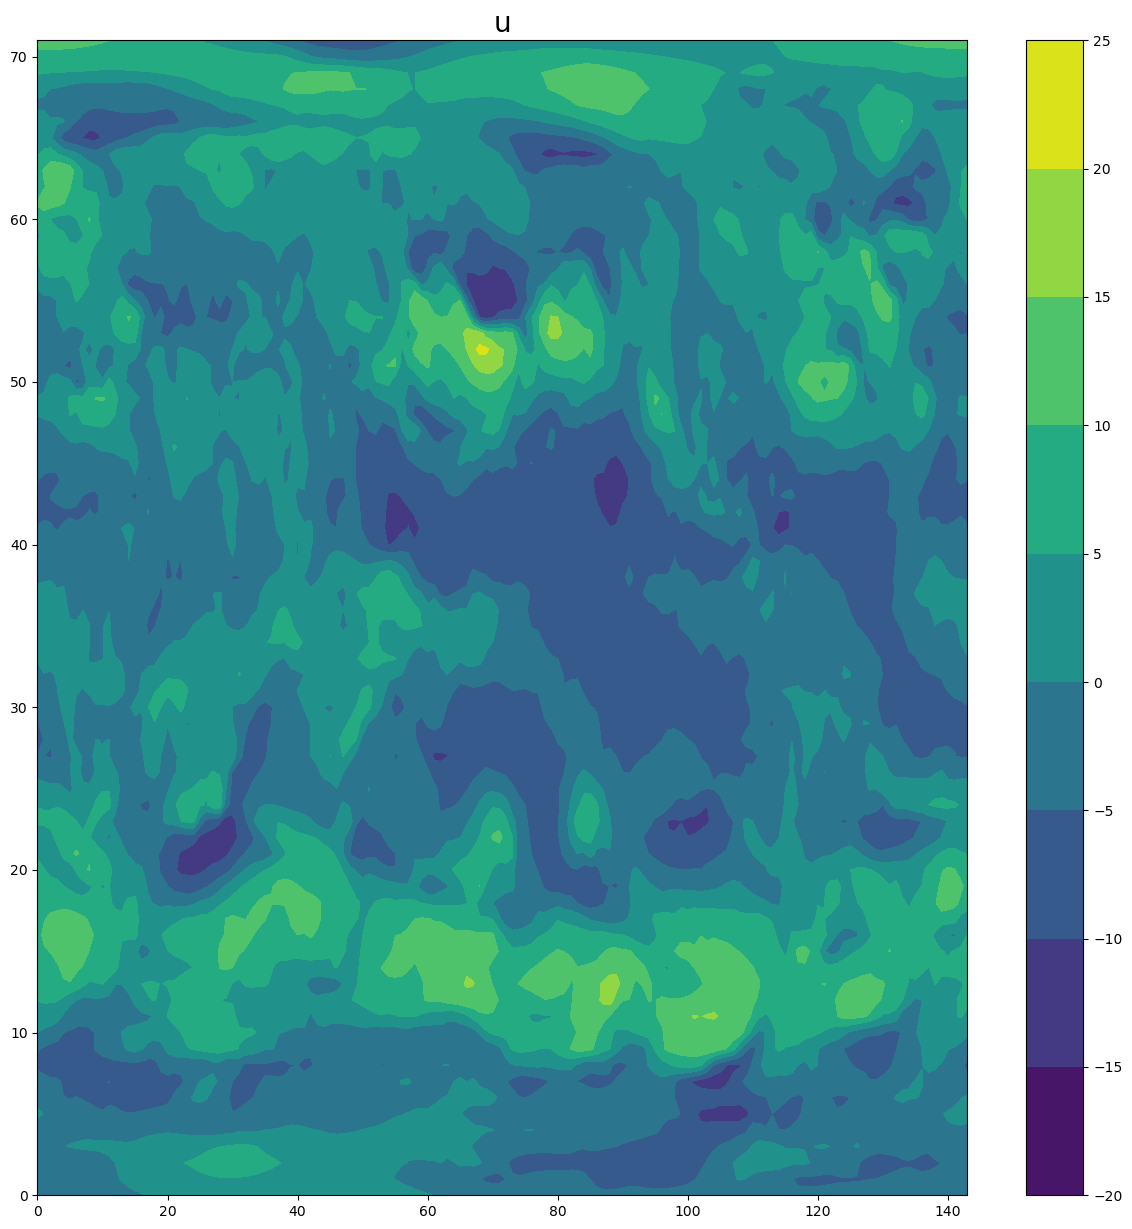

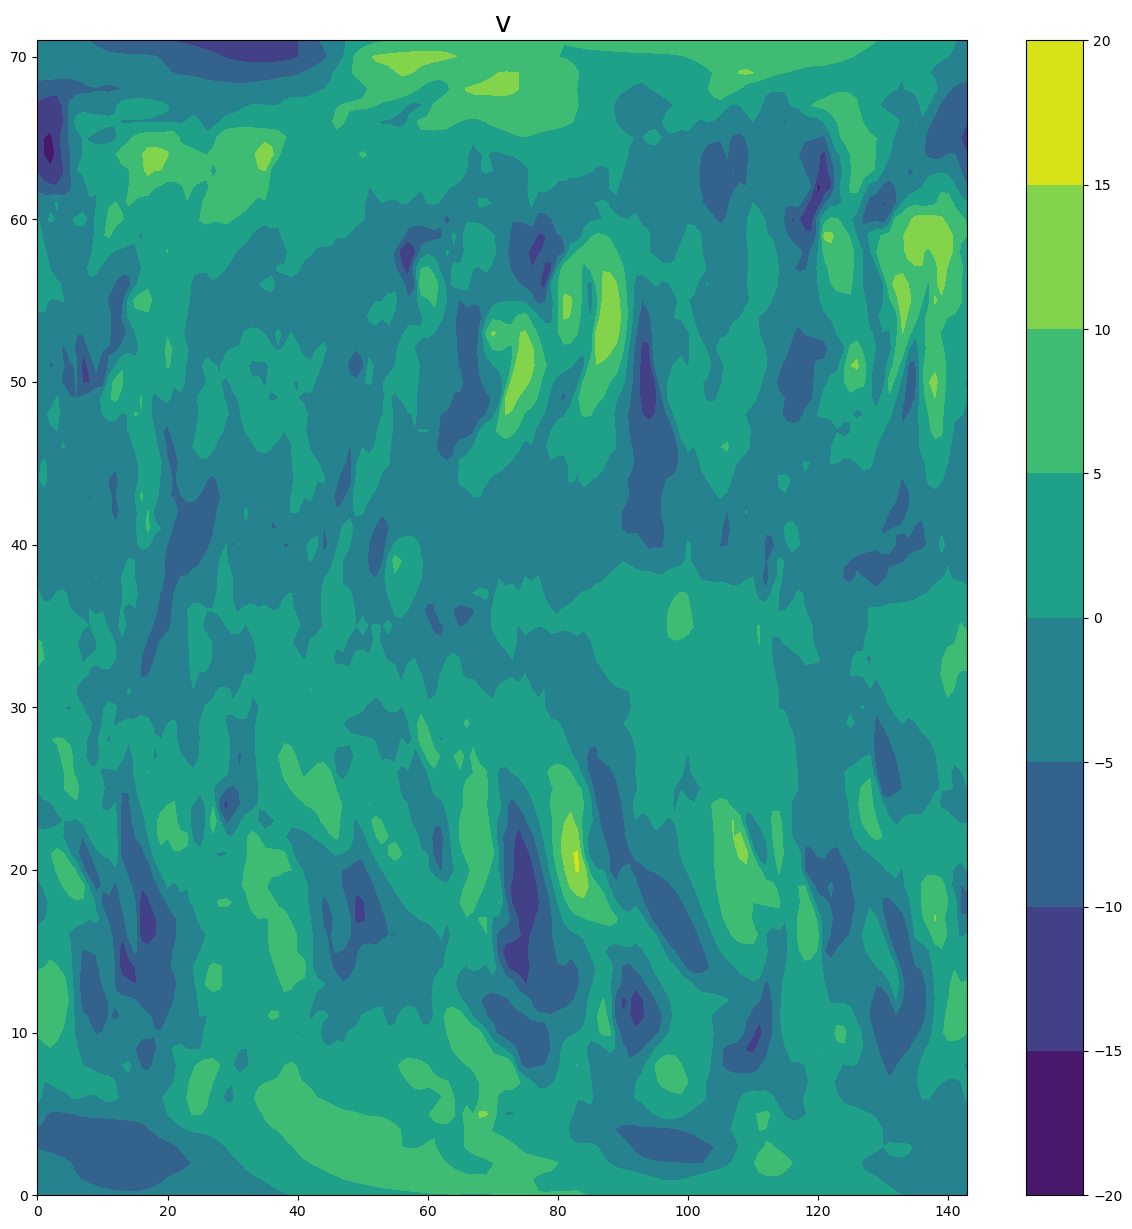

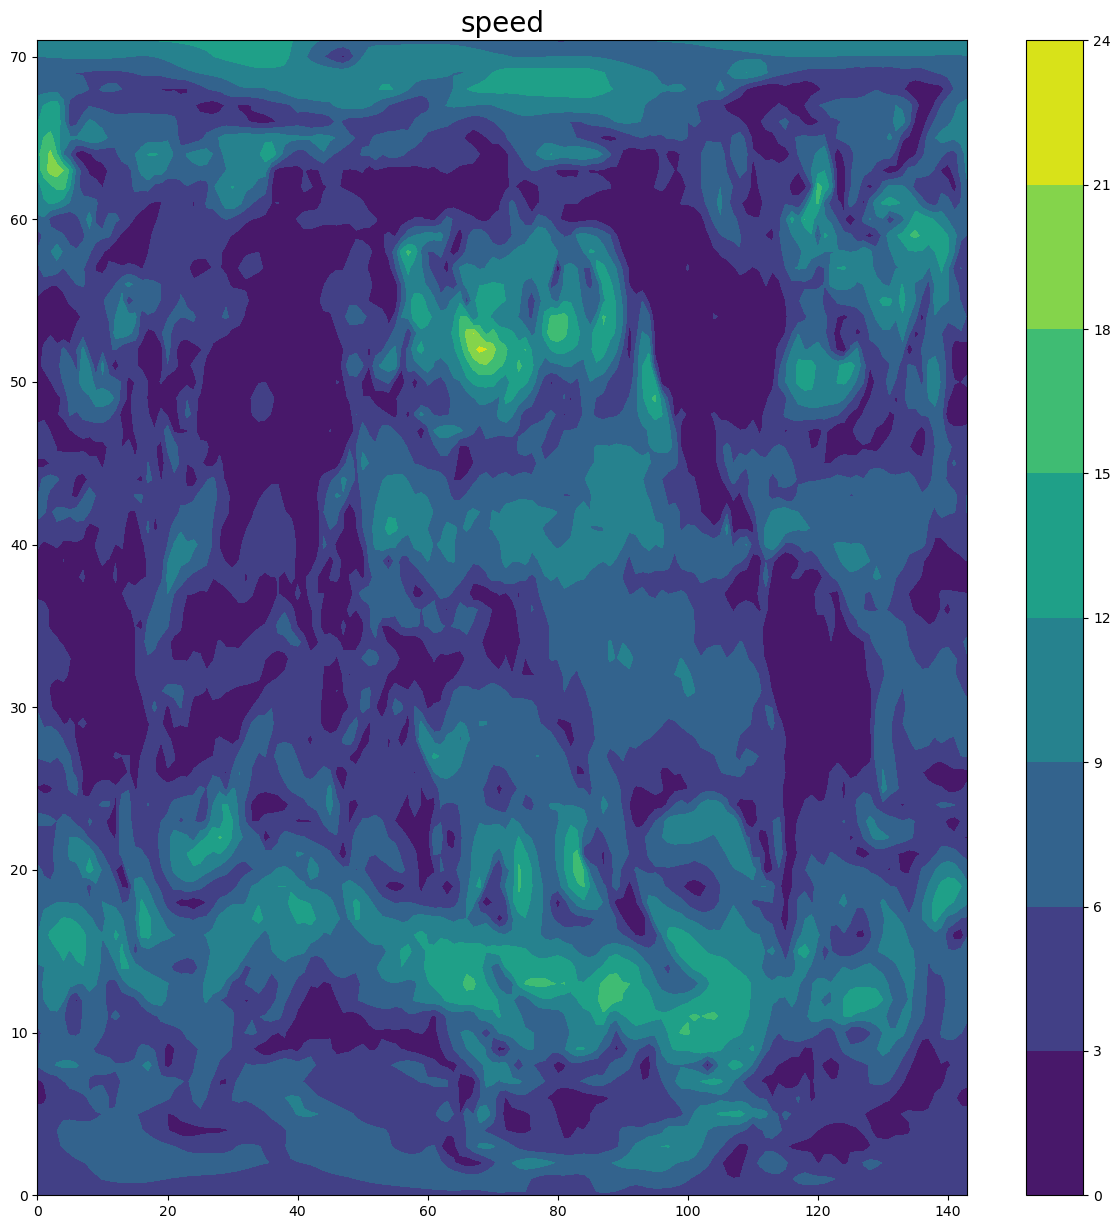

In [3]:



# Quick contour plot of the data 
fig = plt.figure(figsize=(15,15))
plt.contourf(ncw['u10'][:,:])
plt.title("u", fontsize=20)
plt.colorbar()

fig = plt.figure(figsize=(15,15))
plt.contourf(ncw['v10'][:,:])
plt.title("v", fontsize=20)
plt.colorbar()

fig = plt.figure(figsize=(15,15))
plt.contourf(speed[:,:])
plt.title("speed", fontsize=20)
plt.colorbar()






Text(0.5, 1.0, 'v')

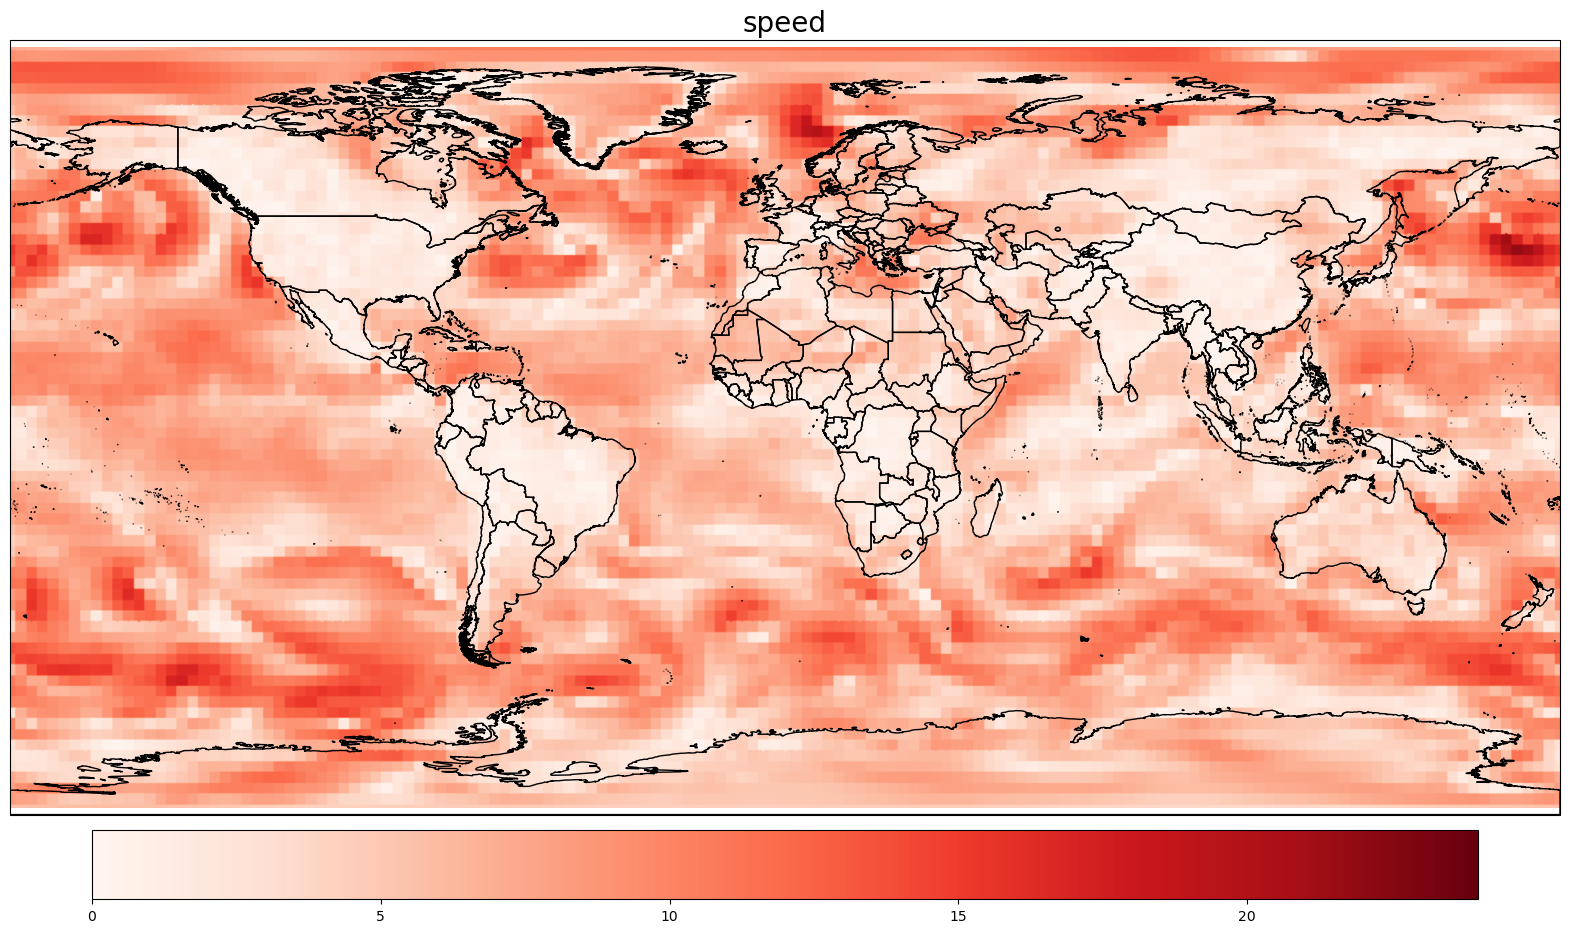

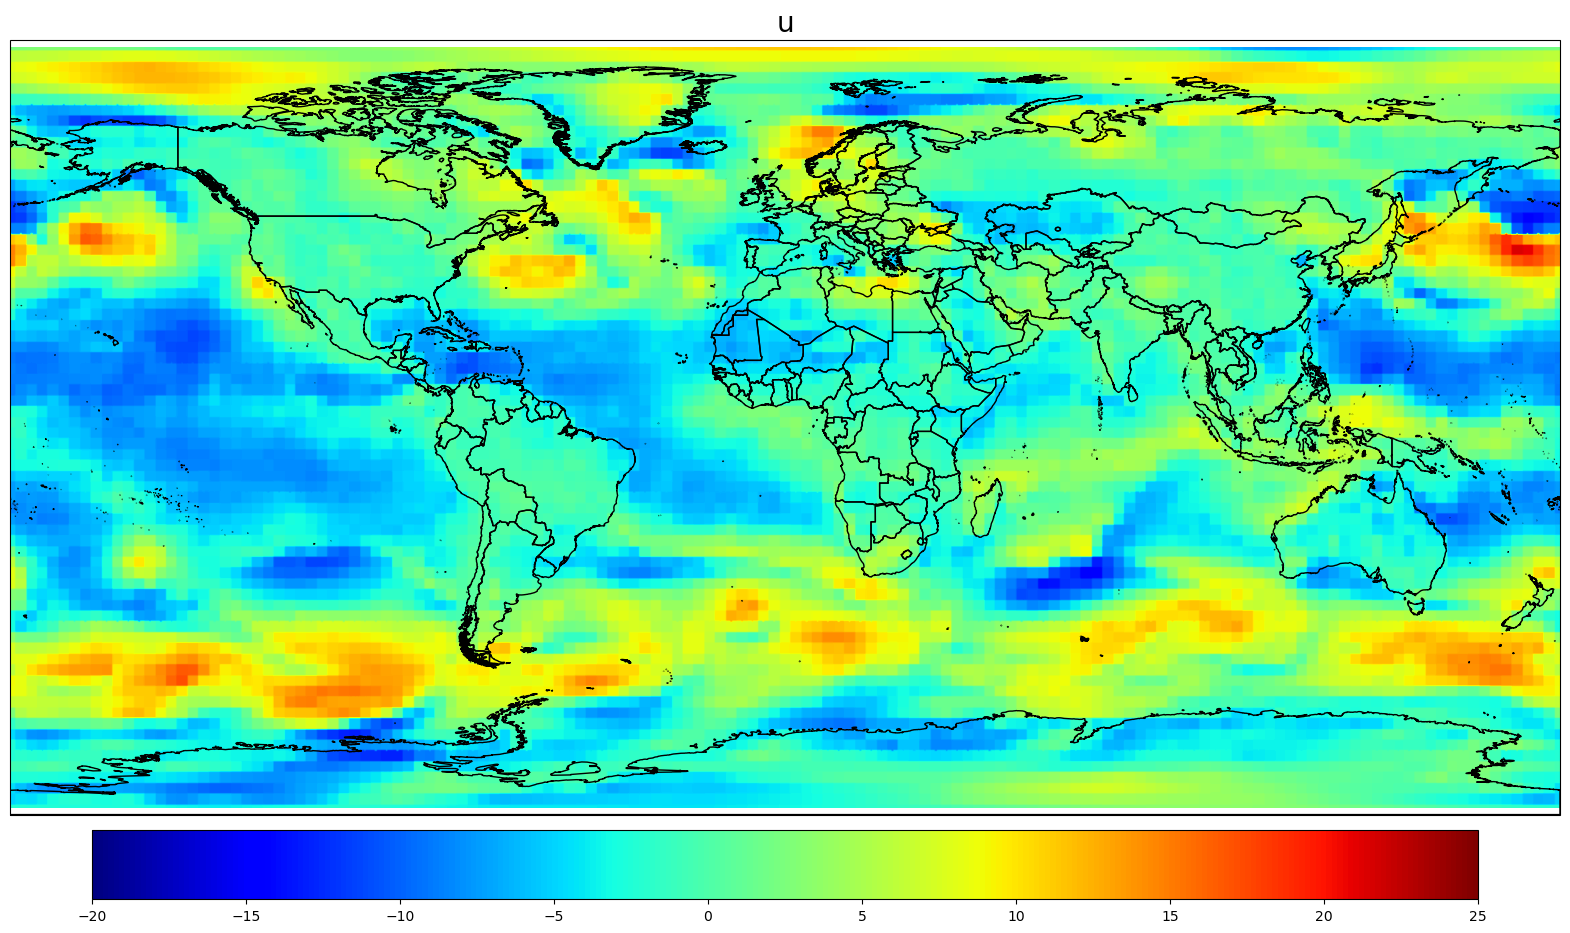

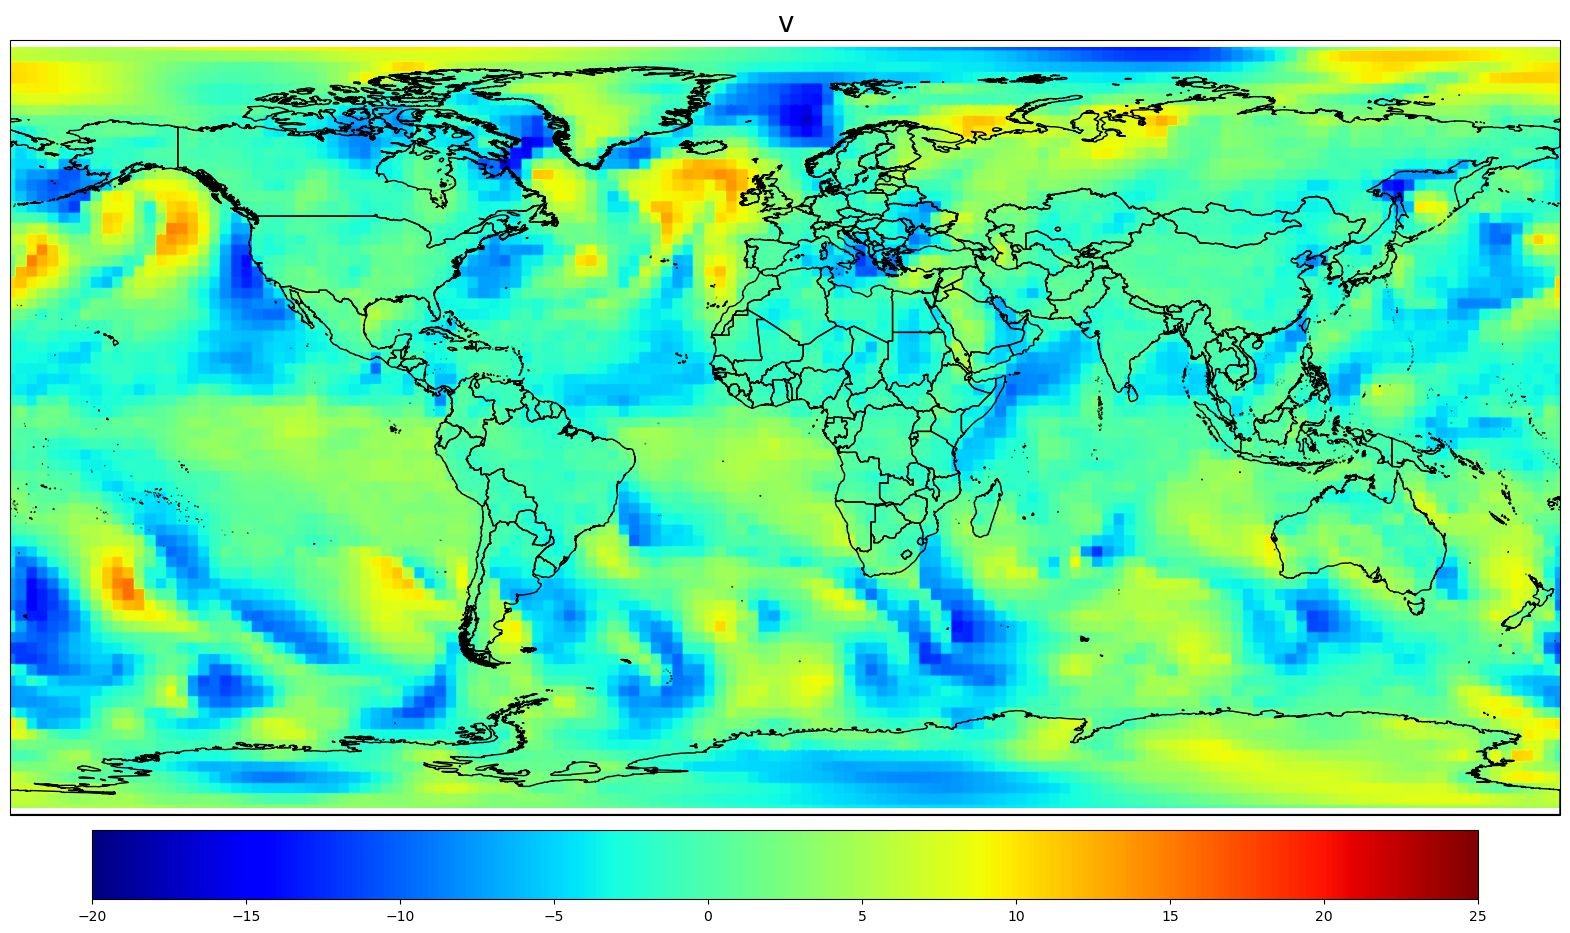

In [4]:
# ContourPlot with map



from cartopy.feature import NaturalEarthFeature


cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90])
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')

xr.plot.imshow(speed[:,:], ax=ax, add_labels=False,
                   vmin=0, vmax=24, cmap='Reds', 
                   cbar_kwargs=cbar_kwargs, interpolation='bicubic')

plt.title("speed", fontsize=20)


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90])
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')

xr.plot.imshow(ncw['u10'][:,:], ax=ax, add_labels=False,
                   vmin=-20, vmax=25, cmap='jet', 
                   cbar_kwargs=cbar_kwargs, interpolation='bicubic')

plt.title("u", fontsize=20)



fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())

ax.set_extent([-180, 180, -90, 90])

#Adding contour of continent
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')

xr.plot.imshow(ncw['v10'][:,:], ax=ax, add_labels=False,
                   vmin=-20, vmax=25, cmap='jet', 
                   cbar_kwargs=cbar_kwargs, interpolation='bicubic')

plt.title("v", fontsize=20)



#plt.contourf(ncw['u10'][:,:])


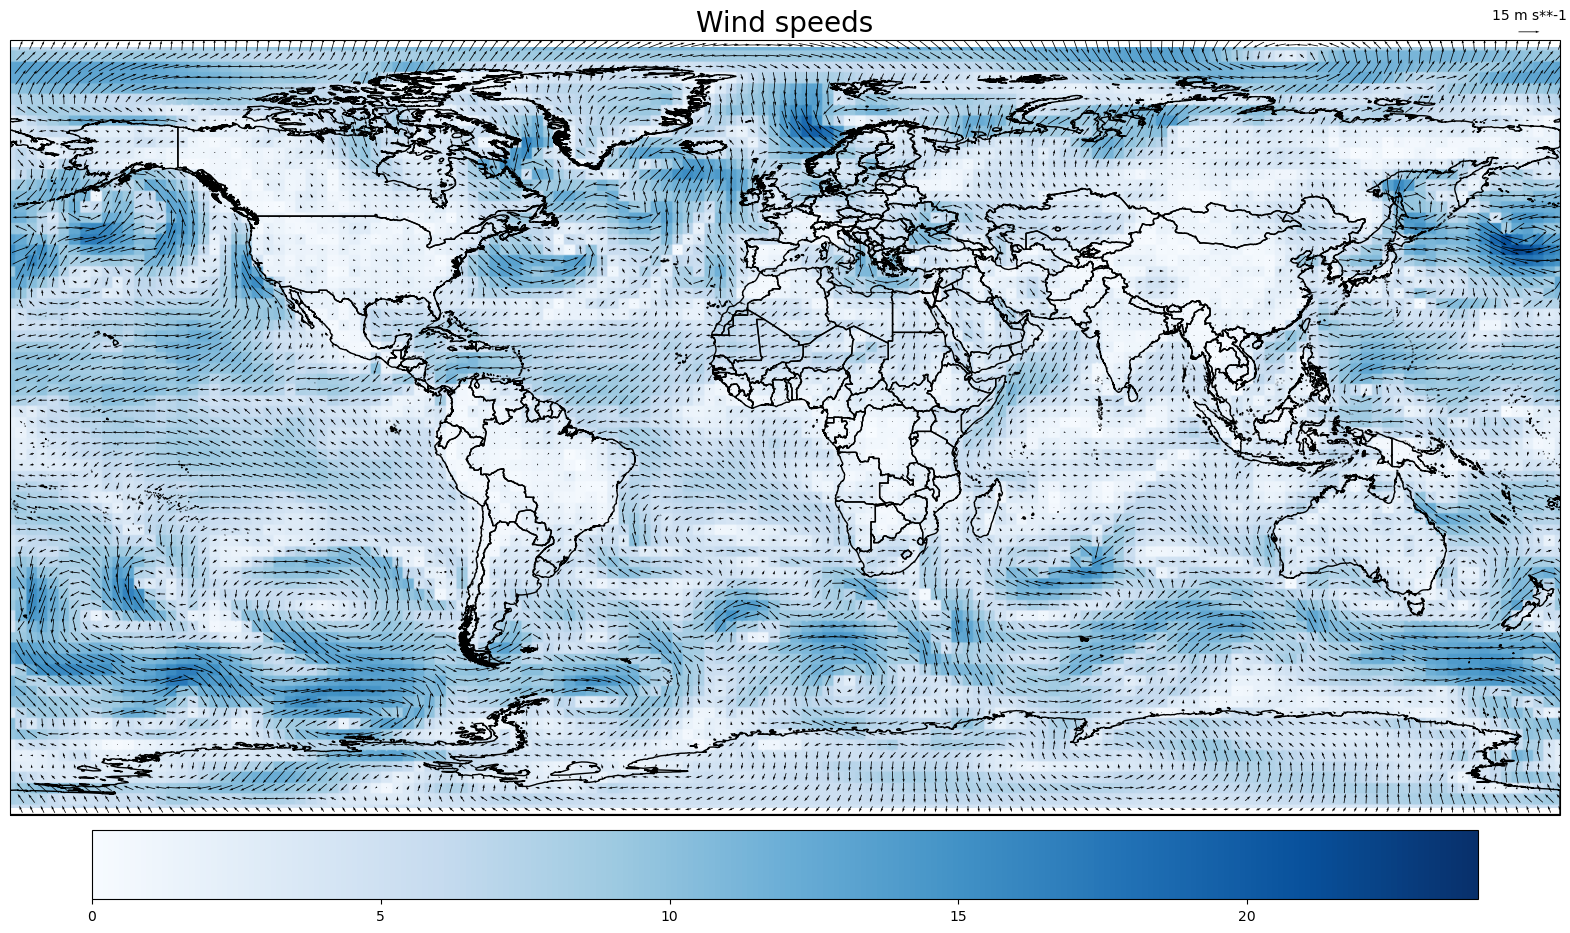

In [5]:
# ContourPlot with map and winds arrows
# -- Add arrows to show the wind vectors --


from cartopy.feature import NaturalEarthFeature


cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90])
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')

xr.plot.imshow(speed[:,:], ax=ax, add_labels=False,
                   vmin=0, vmax=24, cmap='Blues', 
                   cbar_kwargs=cbar_kwargs, interpolation='bicubic')

plt.title("Wind speeds", fontsize=20)


x = ncw['u10'].lon.values
y = ncw['u10'].lat.values
u = ncw['u10'].values
v = ncw['v10'].values



#Here we add the arrow
Q = plt.quiver( x, y, u, v,
               pivot='middle',  #Arrows in the middle of cells
               transform=ccrs.PlateCarree(), 
               width=0.0005   #Change this value to adjust the arrow size depending on the scale of your map
               )



### plot quiver key
qk = plt.quiverkey(Q, 
                   .980, 1.01,                        # x,y label position in % of map size
                   15, str(15)+' '+ncw['u10'].units,  # choose units + update string
                   labelpos='N',                      # add label to the right
                   coordinates='axes'
                   )

### Save the picture in a picture file
plt.savefig("arrowspeedBlack.png", bbox_inches='tight', dpi=150) #Increase dpi for a better png resolution. Other picture format exist




## We can do the same with barbs:

https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/barb_demo.html?highlight=plt%20barbs

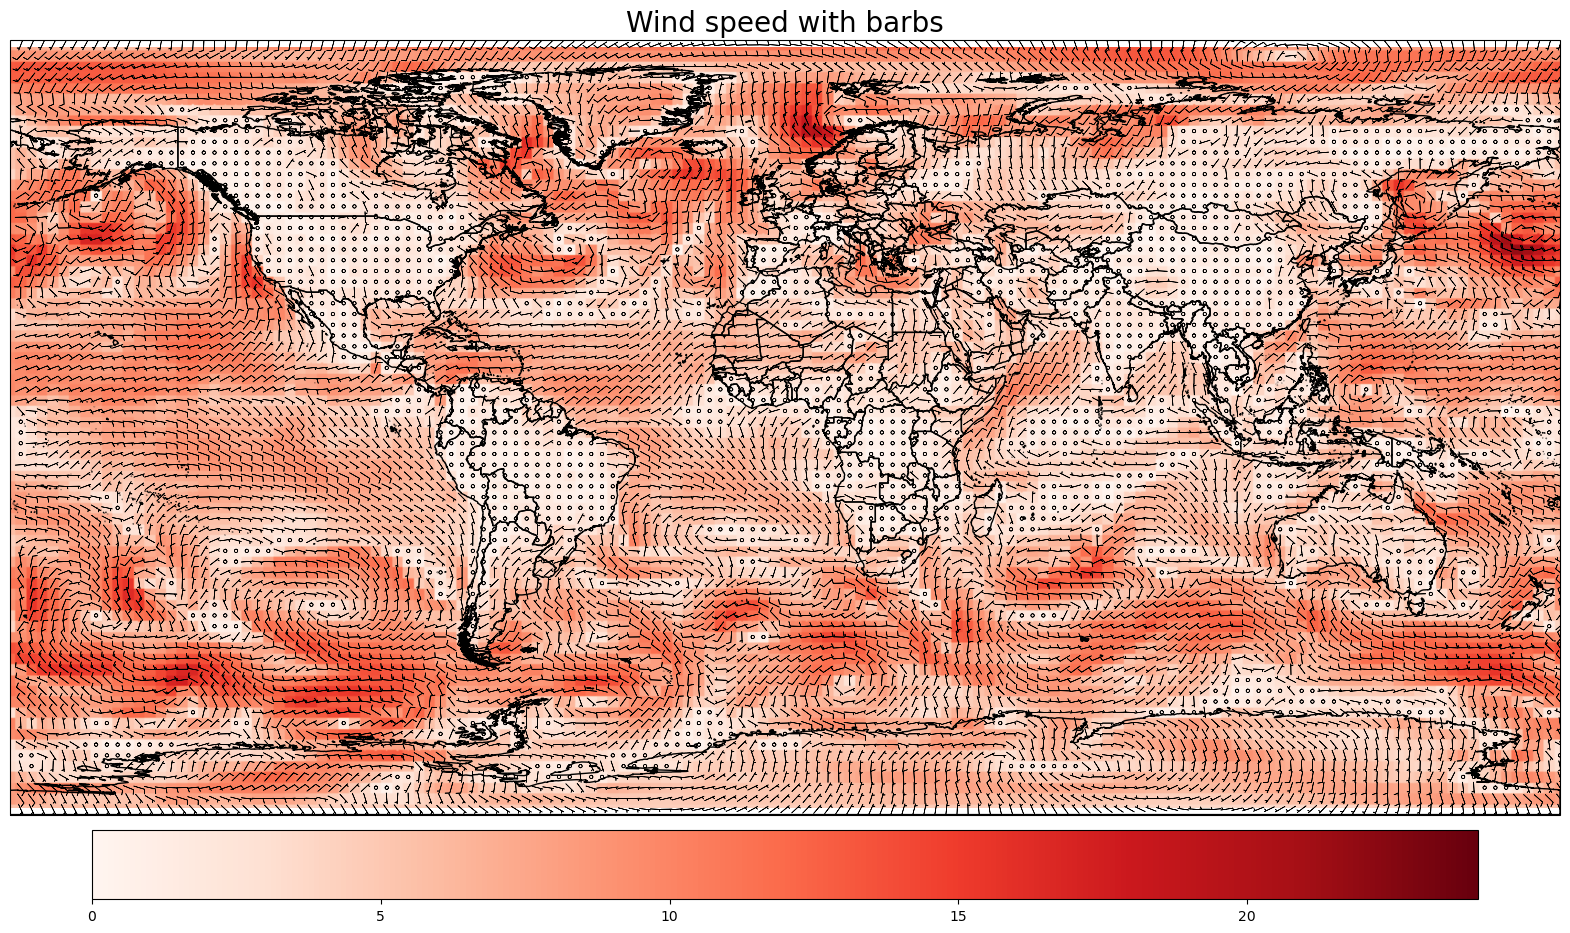

In [6]:
# Here we add the arrows
# ContourPlot with map and winds arrows
# -- Add arrows to show the wind vectors --


from cartopy.feature import NaturalEarthFeature


cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90])
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')

xr.plot.imshow(speed[:,:], ax=ax, add_labels=False,
                   vmin=0, vmax=24, cmap='Reds', 
                   cbar_kwargs=cbar_kwargs, interpolation='bicubic')

plt.title("Wind speed with barbs", fontsize=20)


x = ncw['u10'].lon.values
y = ncw['u10'].lat.values
u = ncw['u10'].values
v = ncw['v10'].values


#Here we add the barbs

Q = plt.barbs( x, y, u, v, 
               pivot='middle', 
               transform=ccrs.PlateCarree(), 
               length=4, linewidth=0.5  #Change this value to adjust the arrow size depending on the scale of your map
               )

# Save data in a picture, here png format. Filename .png for image, .pdf for pdf format. File location can also be specified here.
plt.savefig("barbsSpeedBlack.png", bbox_inches='tight', dpi=300) #Increase dpi for a better png resolution. Other picture format exist


